In [ ]:
# Sales Prediction

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sales=pd.read_csv('/content/archive (16).zip')
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
sales=sales.drop(columns='Unnamed: 0')
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
sales['Sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

In [ ]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sales[['TV','Sales']].max()

TV       296.4
Sales     27.0
dtype: float64

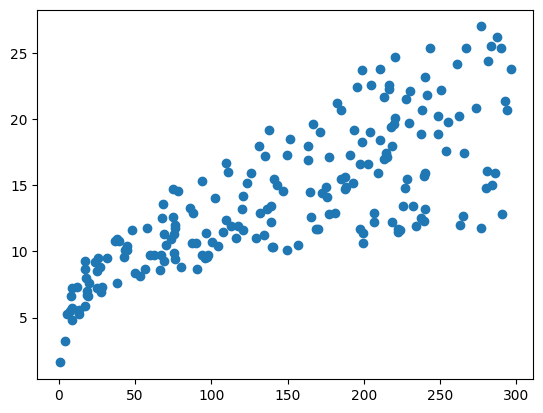

In [ ]:

plt.scatter(sales['TV'],sales['Sales'])

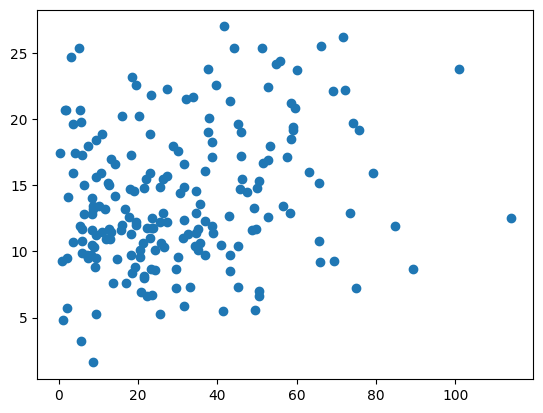

In [ ]:
plt.scatter(sales['Newspaper'],sales['Sales'])

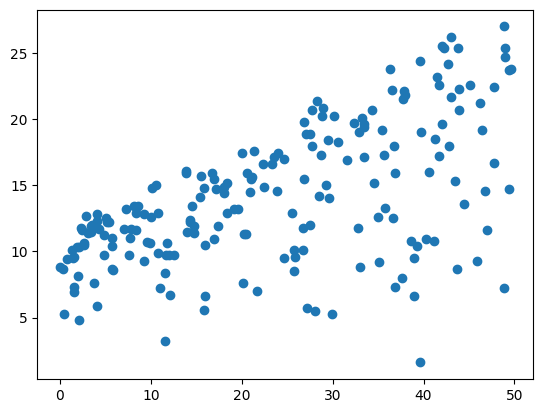

In [ ]:
plt.scatter(sales['Radio'],sales['Sales'])

In [ ]:
x=sales.iloc[:,0:3].values
x

In [ ]:
y=sales.iloc[:,3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(200, 3)
(150, 3)
(50, 3)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([10.21356217,  7.56689655,  7.1046953 , 24.4786537 , 12.18908925,
        6.66930666, 13.27846956, 15.18367259, 11.16941336, 16.50744845,
       23.29411275,  9.27637033, 10.50875866, 15.62264298, 11.7856394 ,
       12.30378143, 18.86716522, 10.98375843, 16.29702002, 17.4733955 ,
       24.54664017,  9.64068738, 15.359316  , 12.5997308 ,  5.79640761,
       15.44958562, 12.40789173, 21.22596166, 13.48654784,  9.31468573,
       13.48547634, 21.8592375 , 18.35287588, 21.44159363,  6.8194993 ,
        6.27445928,  8.10136603, 13.28936999, 15.02024425,  6.34116807,
       12.45784502,  9.33739069, 15.26872923, 16.49708736, 17.40720355,
       13.52914521,  3.79011856, 12.61410406, 16.09639691,  8.83597734])

In [ ]:
y_test

array([11.3,  8.4,  8.7, 25.4, 11.7,  8.7,  7.2, 13.2,  9.2, 16.6, 24.2,
       10.6, 10.5, 15.6, 11.8, 13.2, 17.4,  1.6, 14.7, 17. , 26.2, 10.3,
       14.9, 12.9,  8.1, 15.2, 12.6, 22.6, 11.6,  8.5, 12.5, 23.7, 16.1,
       21.8,  5.6,  6.7,  9.7, 12.9, 13.6,  7.2, 10.8,  9.5, 15. , 15.9,
       17.1, 14. ,  4.8,  8.7, 15.9, 10.4])

In [ ]:
x_train[10]

array([0.89326035, 0.05846774, 0.421     ])

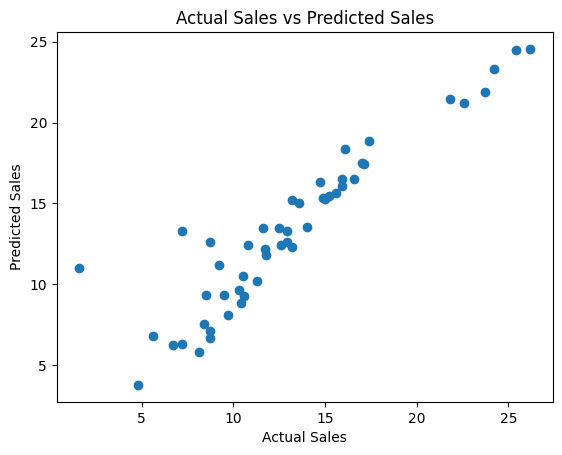

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 4.095678119575901
R-squared: 0.8546884909499614


<ipython-input-22-abb4bb8e19f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['TV'])


<Axes: xlabel='TV', ylabel='Density'>

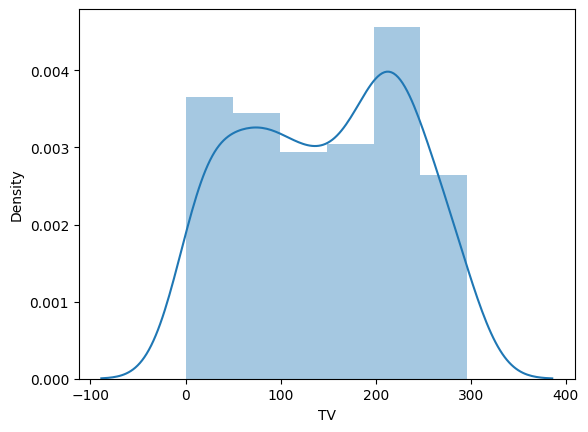

In [ ]:
sns.distplot(sales['TV'])


<ipython-input-23-d9ec4936b85e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

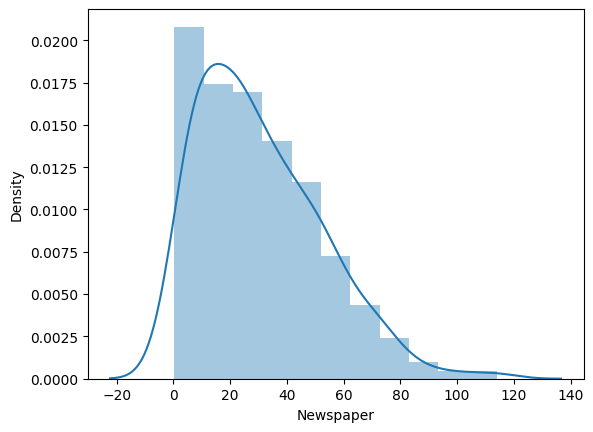

In [ ]:
sns.distplot(sales['Newspaper'])

<ipython-input-24-c4368317853a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

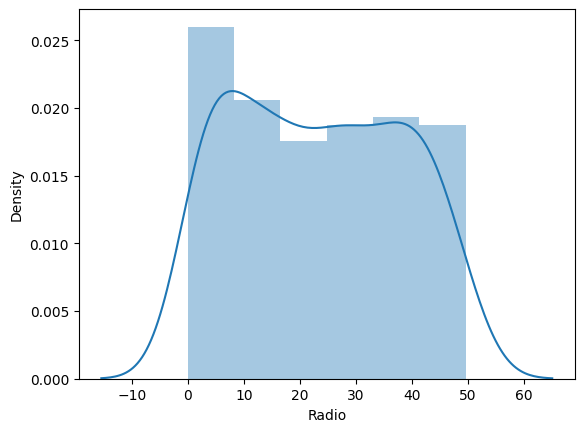

In [ ]:
sns.distplot(sales['Radio'])